<a href="https://colab.research.google.com/github/meghanasri776/python_commands/blob/main/Assignment14_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

Part-1 Company Dataset Exercise

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
com=pd.read_csv("Company_Data.csv")

In [ ]:
com.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [ ]:
com.tail()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes

In [ ]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
com.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [ ]:
com.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
com.shape

(400, 11)

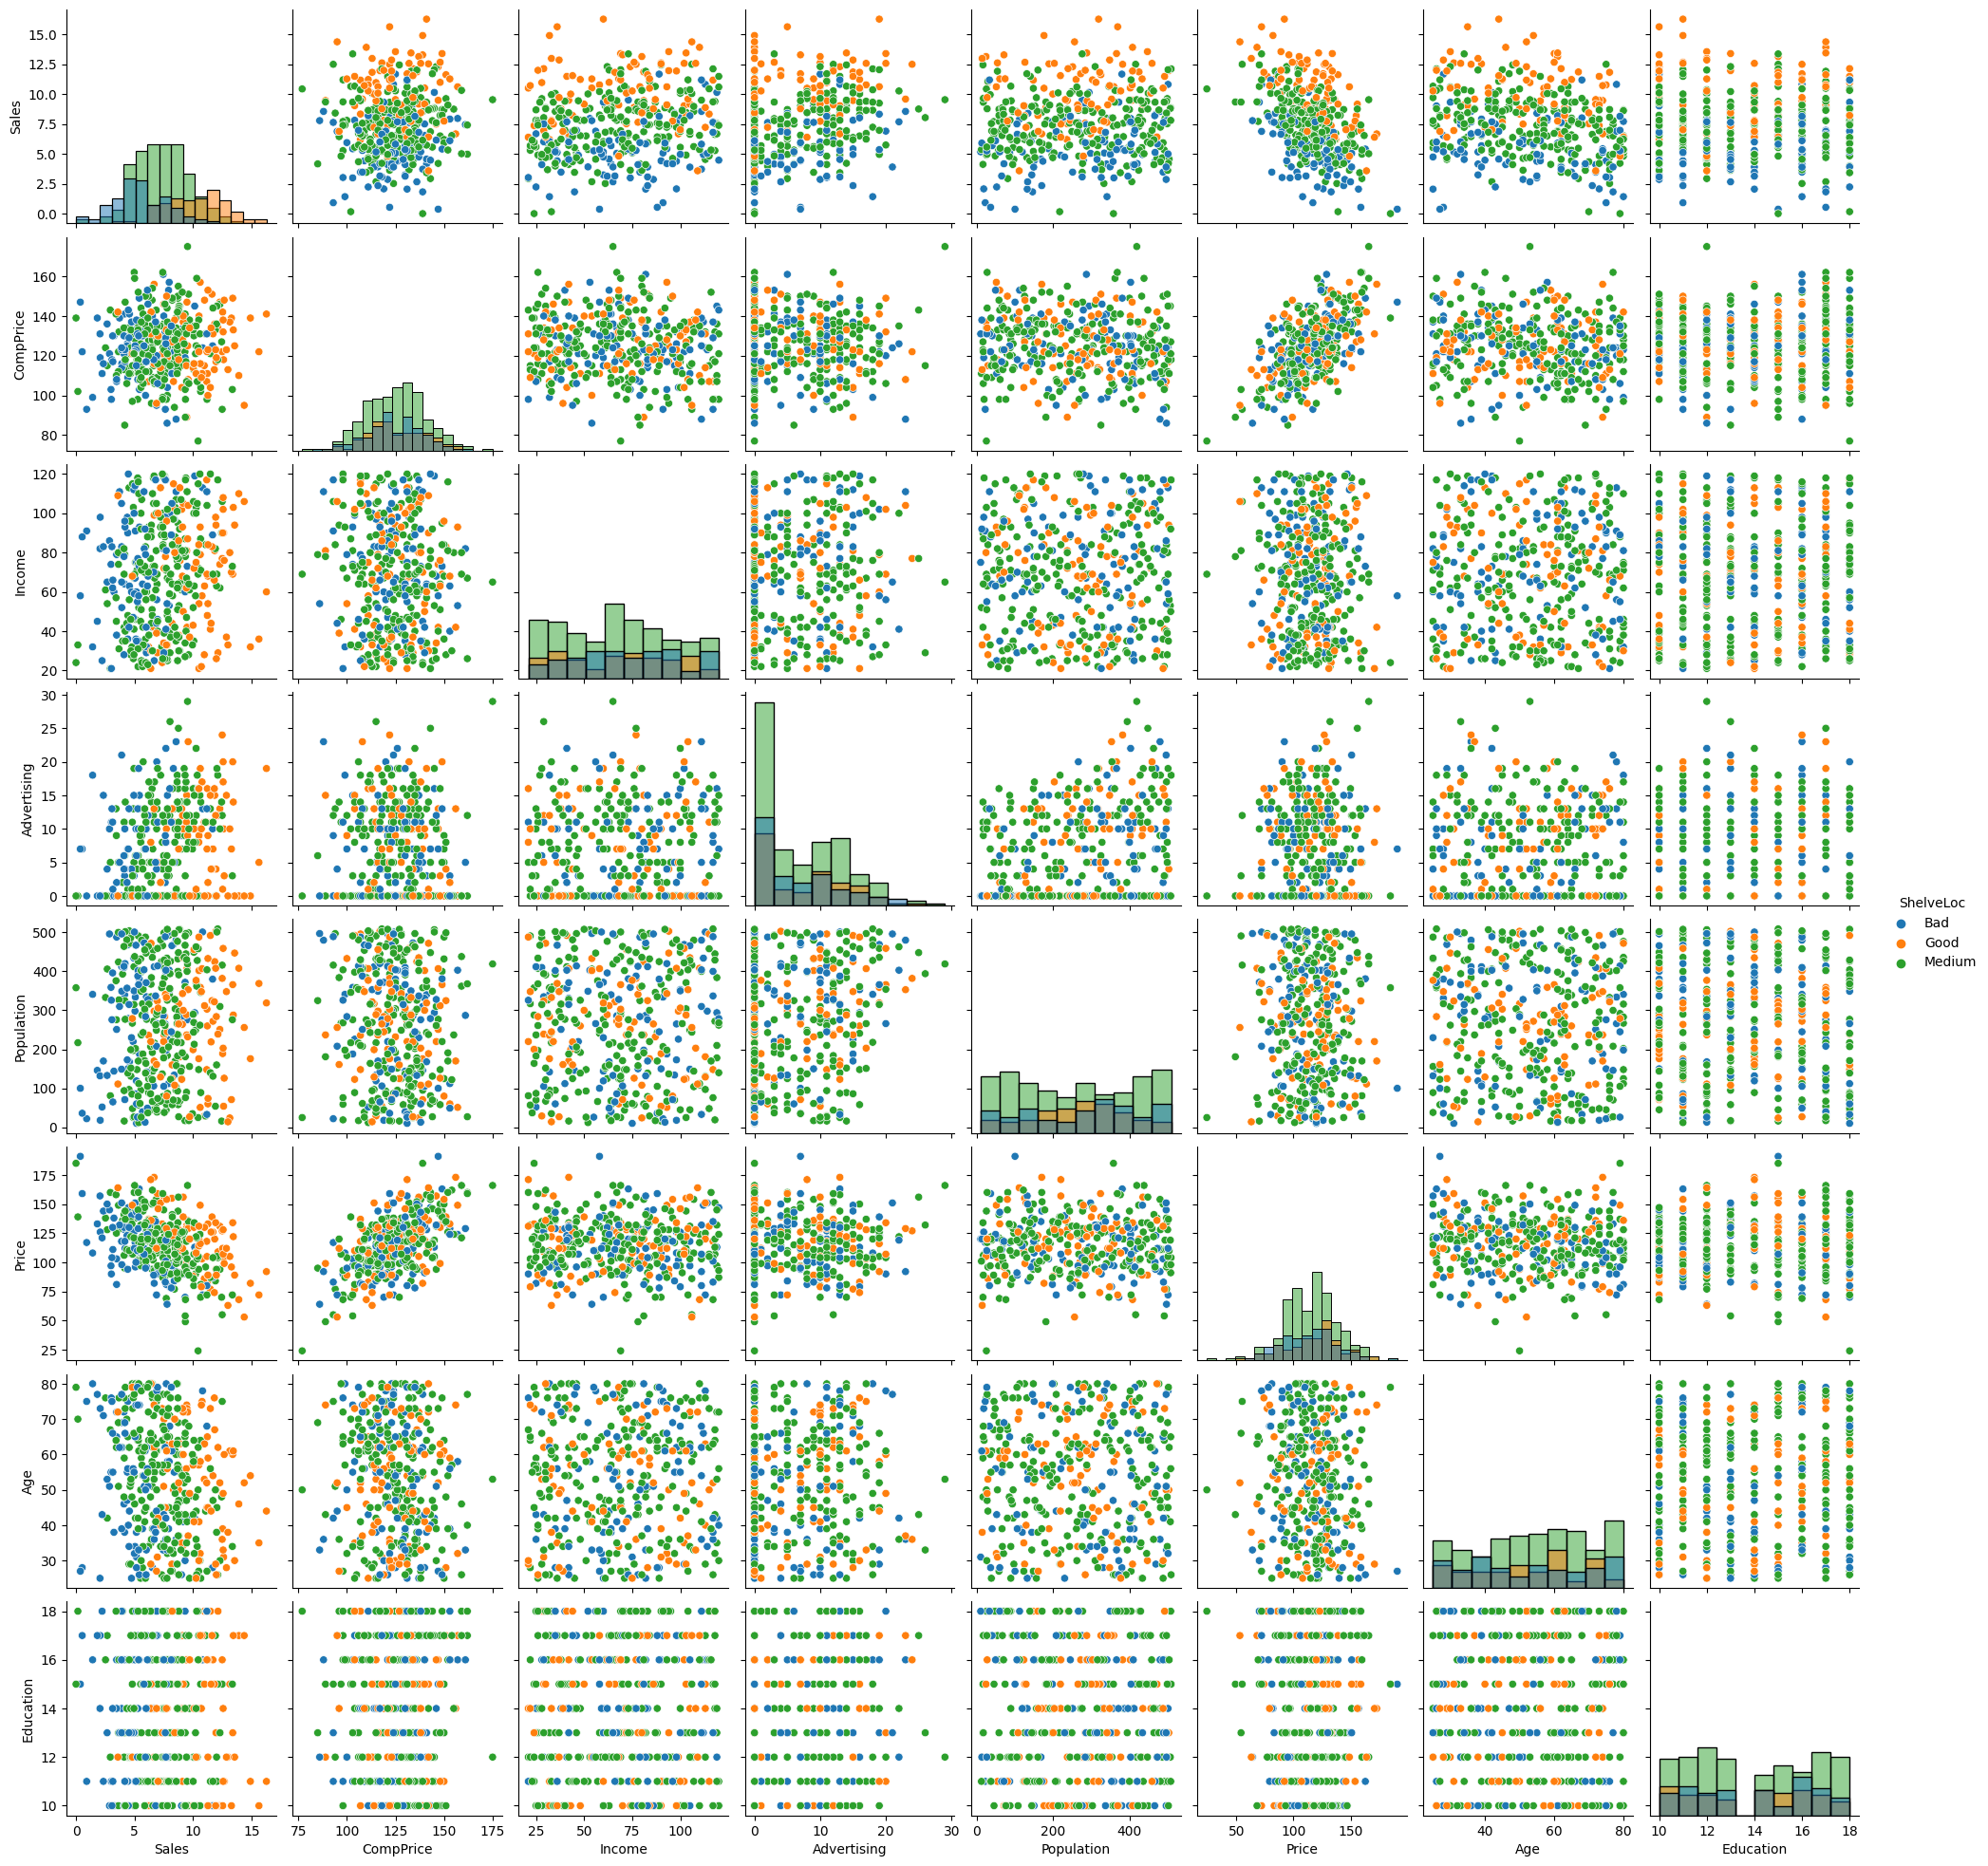

In [ ]:
sns.pairplot(data=com, hue="ShelveLoc", diag_kind="hist")
plt.show()

In [ ]:
category= [var for var in com.columns if com[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(category)))
print('The categorical variables are as follows :\n\n', category)

There are 3 categorical variables

The categorical variables are as follows :

 ['ShelveLoc', 'Urban', 'US']


In [ ]:
numerical = [var for var in com.columns if com[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [ ]:
for var in category:
    print(var, 'has ', len(com[var].unique()), ' labels')

ShelveLoc has  3  labels
Urban has  2  labels
US has  2  labels


In [ ]:
com[com.duplicated()].shape

(0, 11)

In [ ]:
com=pd.get_dummies(com,columns=['Urban','US'], drop_first=True)

In [ ]:
com['ShelveLoc']=com['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [ ]:
com.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          3   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          3   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0

In [ ]:
com['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [ ]:
com['Sales'] = pd.cut(com['Sales'], bins=[-1, 7.5, 16.3], labels=['low', 'high'])

In [ ]:
com.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0  high        138      73           11         276    120          3   42   
1  high        111      48           16         260     83          1   65   
2  high        113      35           10         269     80          2   59   
3   low        117     100            4         466     97          2   55   
4   low        141      64            3         340    128          3   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0

In [ ]:
LabelEncoder = LabelEncoder()
com['Sales']=LabelEncoder.fit_transform(com['Sales'])

In [ ]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int64
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban_Yes    400 non-null    uint8
 10  US_Yes       400 non-null    uint8
dtypes: int64(9), uint8(2)
memory usage: 29.0 KB


In [ ]:
com.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban_Yes      0
US_Yes         0
dtype: int64

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
df_norm = norm_func(com)
df_norm.head(10)

Sales  CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0    0.0   0.622449  0.525253     0.379310    0.533066  0.574850        1.0   
1    0.0   0.346939  0.272727     0.551724    0.501002  0.353293        0.0   
2    0.0   0.367347  0.141414     0.344828    0.519038  0.335329        0.5   
3    1.0   0.408163  0.797980     0.137931    0.913828  0.437126        0.5   
4    1.0   0.653061  0.434343     0.103448    0.661323  0.622754        1.0   
5    0.0   0.479592  0.929293     0.448276    0.983968  0.287425        1.0   
6    1.0   0.387755  0.848485     0.000000    0.070140  0.502994        0.5   
7    0.0   0.602041  0.606061     0.517241    0.831663  0.574850        0.0   
8    1.0   0.561224  0.898990     0.000000    0.196393  0.598802        0.5   
9    1.0   0.561224  0.929293     0.000000    0.242485  0.598802        0.5   

        Age  Education  Urban_Yes  US_Yes  
0  0.309091      0.875        1.0     1.0  
1  0.727273      0.000        1.0     1.0  
2  0.618182      0.250        1.0     1.0  
3  0.545455      0.500        1.0     1.0  
4  0.236364      0.375        1.0     0.0  
5  0.963636      0.750        0.0     1.0  
6  0.836364      0.625        1.0     0.0  
7  0.763636      0.000        1.0     1.0  
8  0.927273      0.000        0.0     0.0  
9  0.927273      0.875        0.0     1.0

In [ ]:
x=df_norm.iloc[:,1:]
y=df_norm['Sales']
x

CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0     0.622449  0.525253     0.379310    0.533066  0.574850        1.0   
1     0.346939  0.272727     0.551724    0.501002  0.353293        0.0   
2     0.367347  0.141414     0.344828    0.519038  0.335329        0.5   
3     0.408163  0.797980     0.137931    0.913828  0.437126        0.5   
4     0.653061  0.434343     0.103448    0.661323  0.622754        1.0   
..         ...       ...          ...         ...       ...        ...   
395   0.622449  0.878788     0.586207    0.386774  0.622754        0.0   
396   0.632653  0.020202     0.103448    0.054108  0.574850        0.5   
397   0.867347  0.050505     0.413793    0.717435  0.808383        0.5   
398   0.234694  0.585859     0.241379    0.549098  0.425150        1.0   
399   0.581633  0.161616     0.000000    0.034068  0.574850        0.0   

          Age  Education  Urban_Yes  US_Yes  
0    0.309091      0.875        1.0     1.0  
1    0.727273      0.000        1.0     1.0  
2    0.618182      0.250        1.0     1.0  
3    0.545455      0.500        1.0     1.0  
4    0.236364      0.375        1.0     0.0  
..        ...        ...        ...     ...  
395  0.145455      0.500        1.0     1.0  
396  0.545455      0.125        0.0     1.0  
397  0.272727      1.000        1.0     1.0  
398  0.454545      0.250        1.0     1.0  
399  0.436364      0.750        1.0     1.0  

[400 rows x 10 columns]

In [ ]:
y

0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
395    0.0
396    1.0
397    1.0
398    1.0
399    0.0
Name: Sales, Length: 400, dtype: float64

In [ ]:
df_norm.Sales.value_counts()

1.0    202
0.0    198
Name: Sales, dtype: int64

In [ ]:
colnames = list(com.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model01 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model01.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

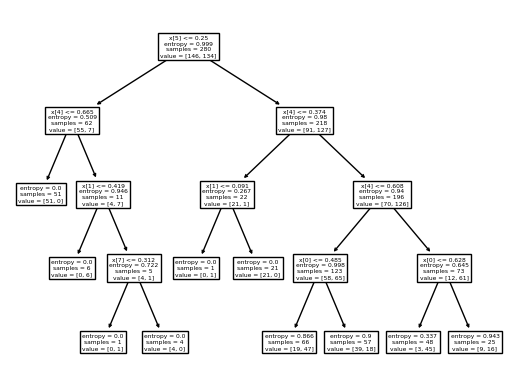

In [ ]:
tree.plot_tree(model01)
plt.show()

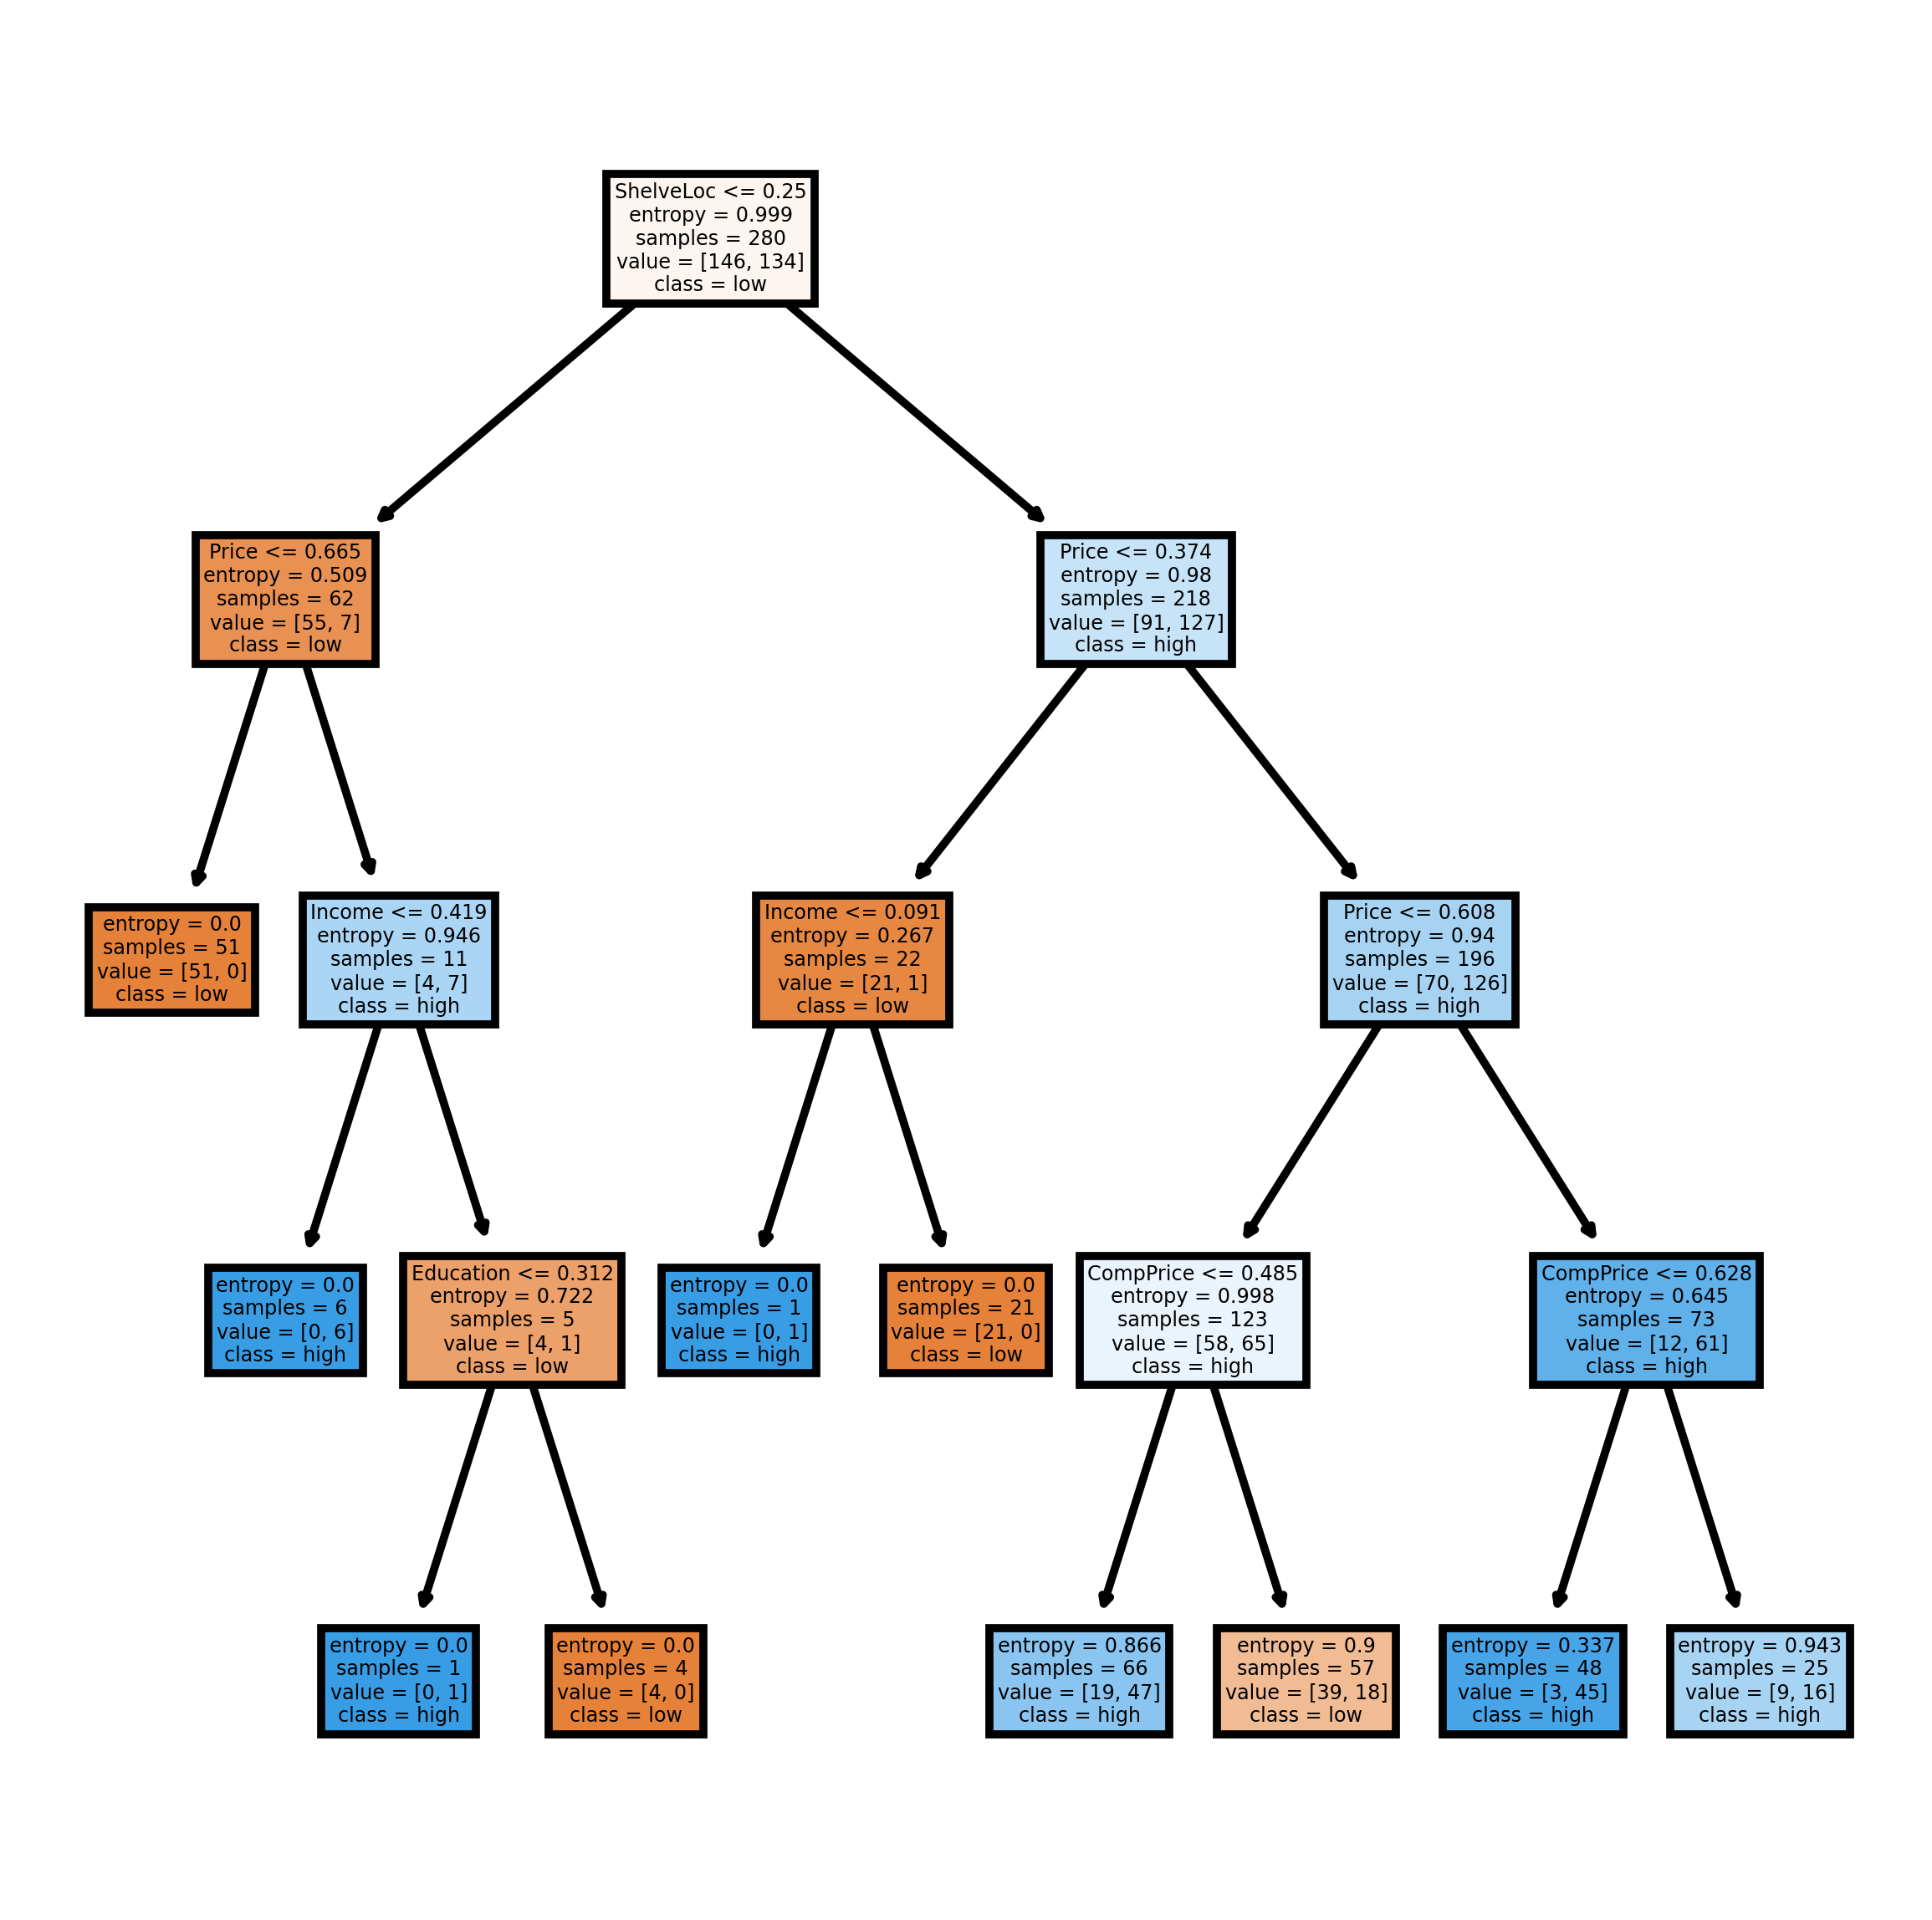

In [ ]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']
cn=['low','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700) # dpi is the pixel size
tree.plot_tree(model01,feature_names = fn, class_names=cn,filled = True);
plt.show()

In [ ]:
preds01 = model01.predict(x_test)
pd.Series(preds01).value_counts()

1.0    75
0.0    45
dtype: int64

In [ ]:
preds01

array([1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1.])

In [ ]:
pd.crosstab(y_test,preds01)

col_0  0.0  1.0
Sales          
0.0     32   20
1.0     13   55

In [ ]:
np.mean(preds01==y_test)

0.725

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds01)

0.725

Finding the best hyper-parameter for the decision tree

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
param_grid = {'criterion' : ['entropy','gini'],
              'max_depth': [2,3,4,5,6,7,8,9,10],
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

In [ ]:
grid_search = GridSearchCV(dt, param_grid, cv=5)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
model_best = DecisionTreeClassifier(criterion = 'gini',max_depth=5,min_samples_split=3,min_samples_leaf=2)
model_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3)

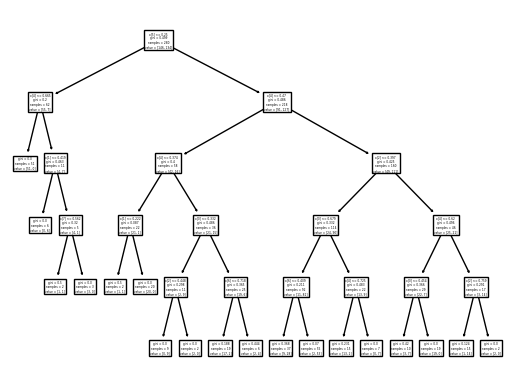

In [ ]:
tree.plot_tree(model_best);
plt.show()

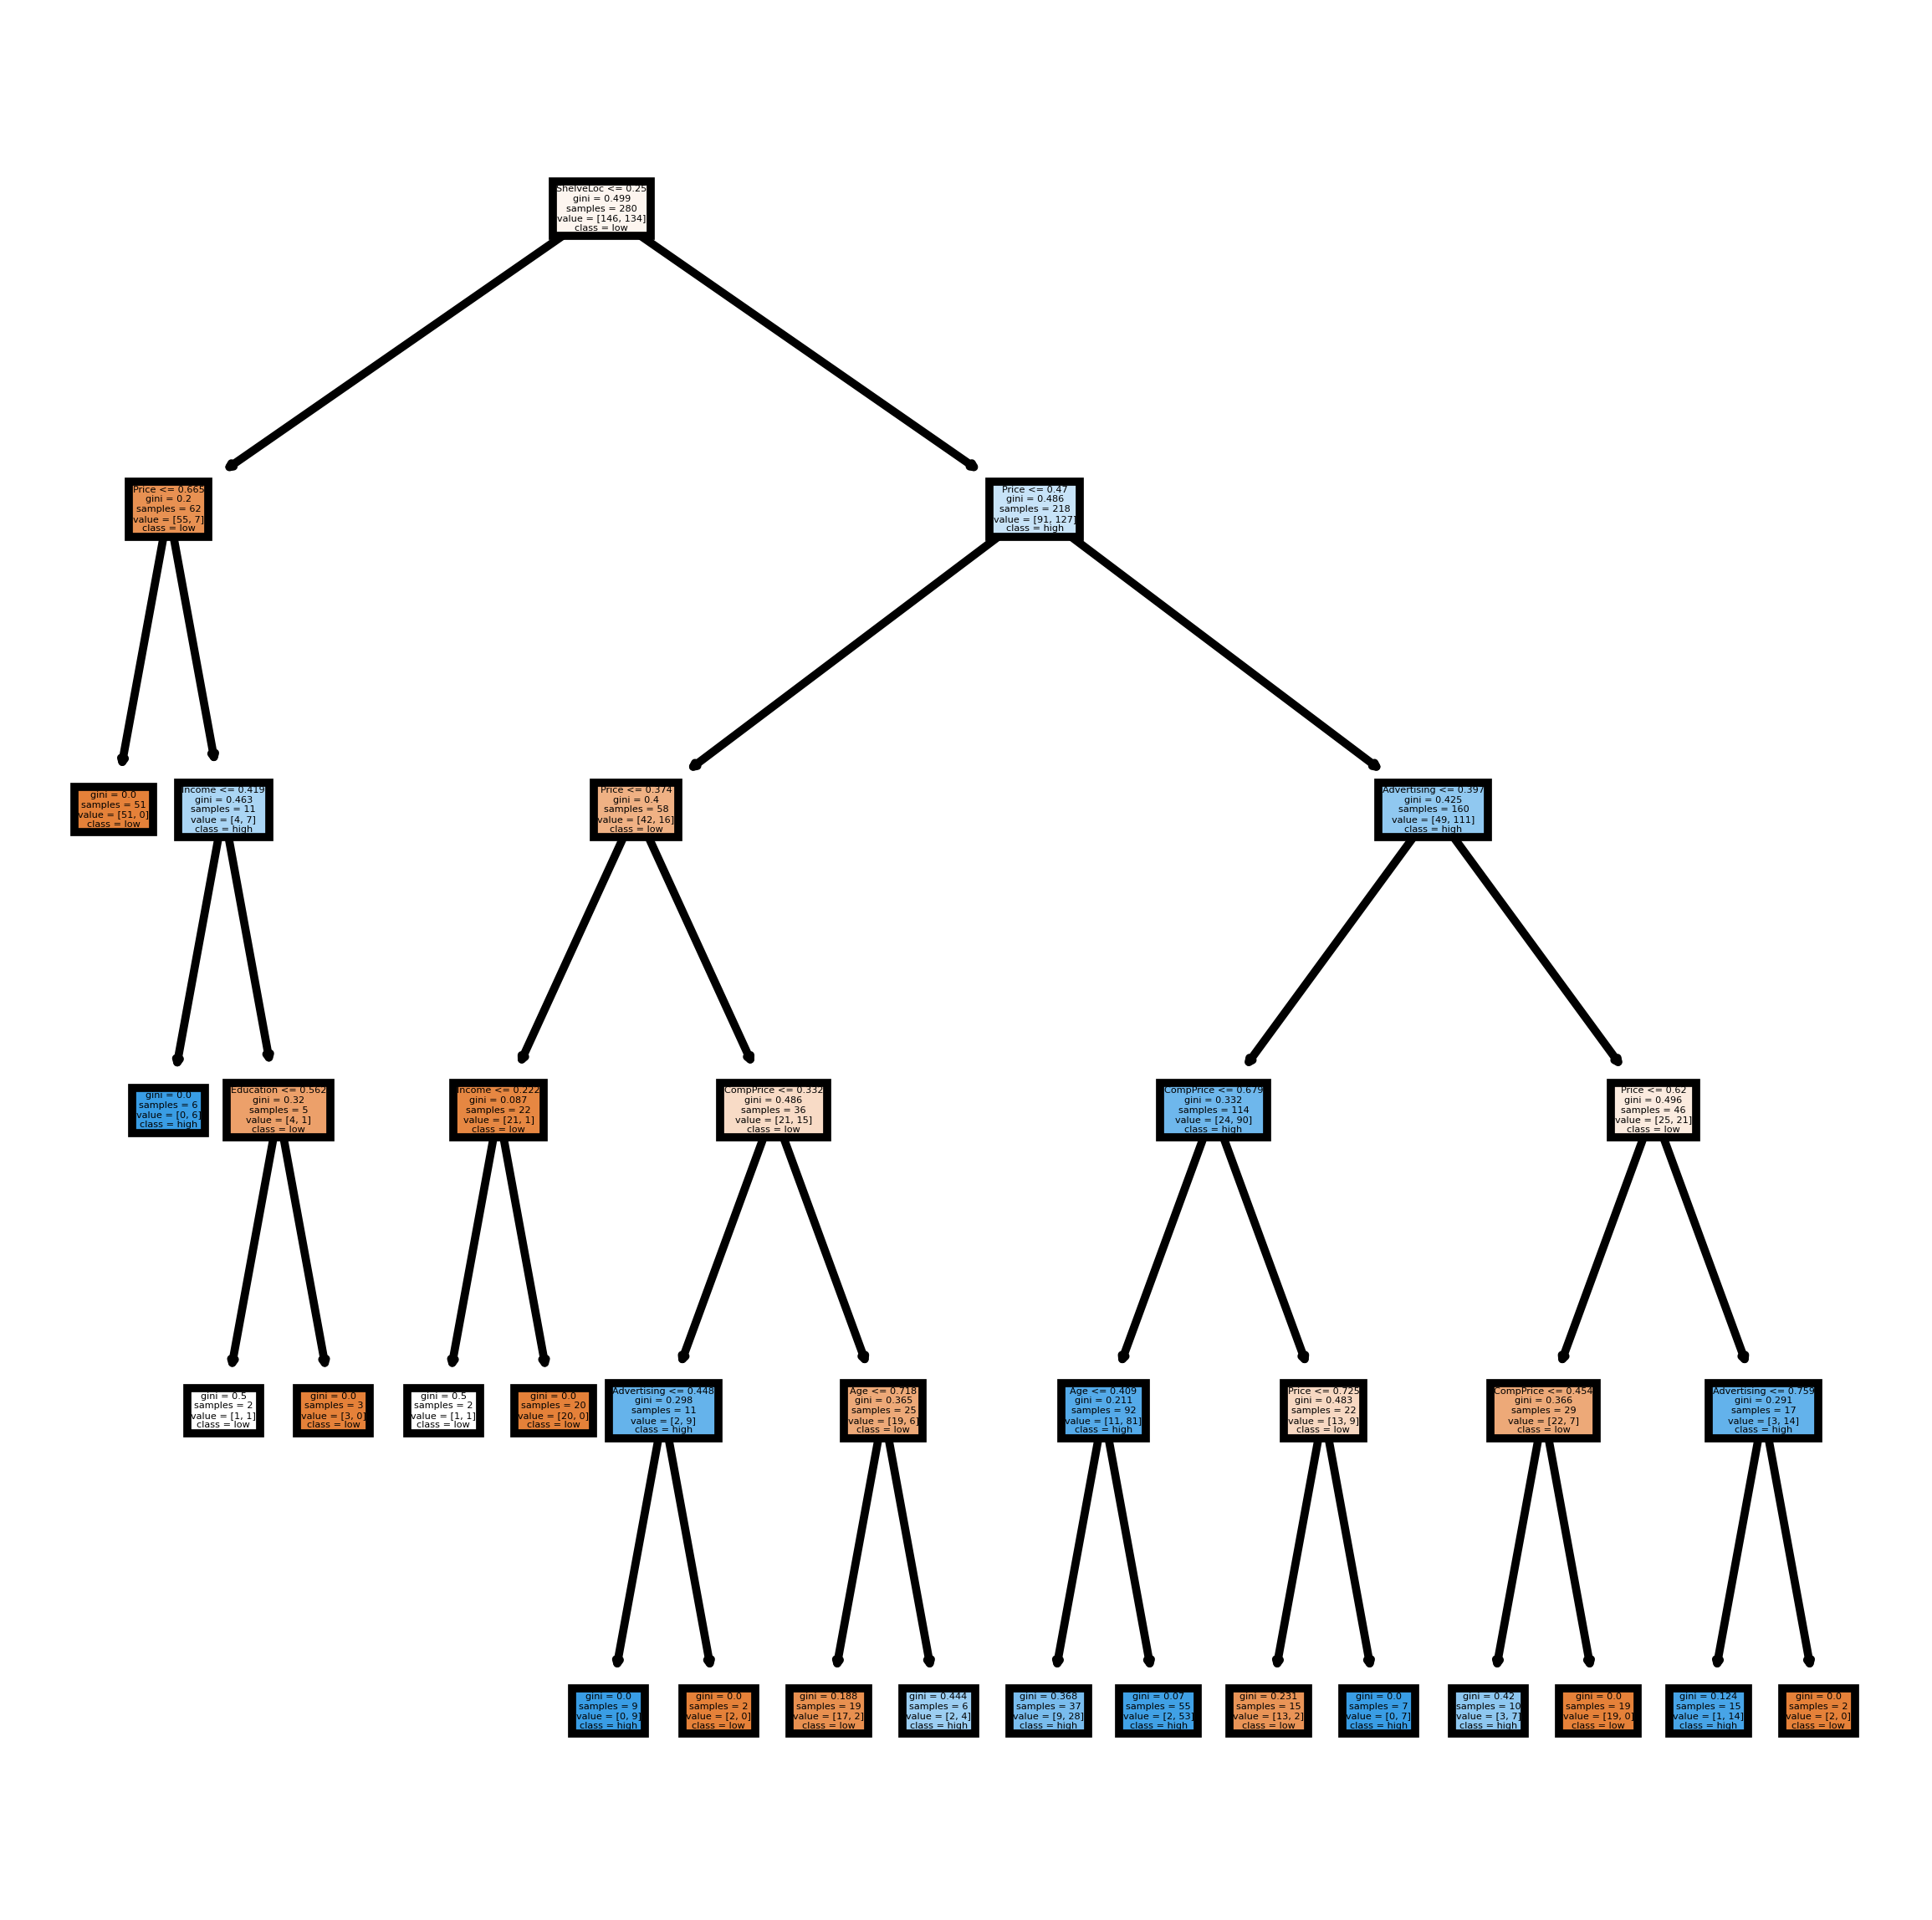

In [ ]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']
cn=['low','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700) # dpi is the pixel size
tree.plot_tree(model_best,
               feature_names = fn,
               class_names=cn,
               filled = True);
plt.show()

In [ ]:
preds_best = model_best.predict(x_test)
pd.Series(preds_best).value_counts()

1.0    72
0.0    48
dtype: int64

In [ ]:
preds_best

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1.])

In [ ]:
pd.crosstab(y_test,preds_best)

col_0  0.0  1.0
Sales          
0.0     34   18
1.0     14   54

In [ ]:
print("the accuracy of the model =",accuracy_score(y_test,preds_best)*100)

the accuracy of the model = 73.33333333333333


The final Decison Tree Model is built with the Accuracy of 77.33% and from this model can find out the Target Variable and also the Feature Important for classifying the Target Variable.

Using decision trees to prepare a model on fraud data.

Part-2 Fraud Check dataset Exercise

In [ ]:
fd=pd.read_csv("Fraud_check.csv")

In [ ]:
fd.head(4)

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES

In [ ]:
fd.tail(4)

Undergrad Marital.Status  Taxable.Income  City.Population  \
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO

In [ ]:
fd.shape

(600, 6)

In [ ]:
fd.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fd.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
fd=pd.get_dummies(fd,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [ ]:
fd["TaxInc"] = pd.cut(fd["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [ ]:
fd = pd.get_dummies(fd,columns = ["TaxInc"],drop_first=True)

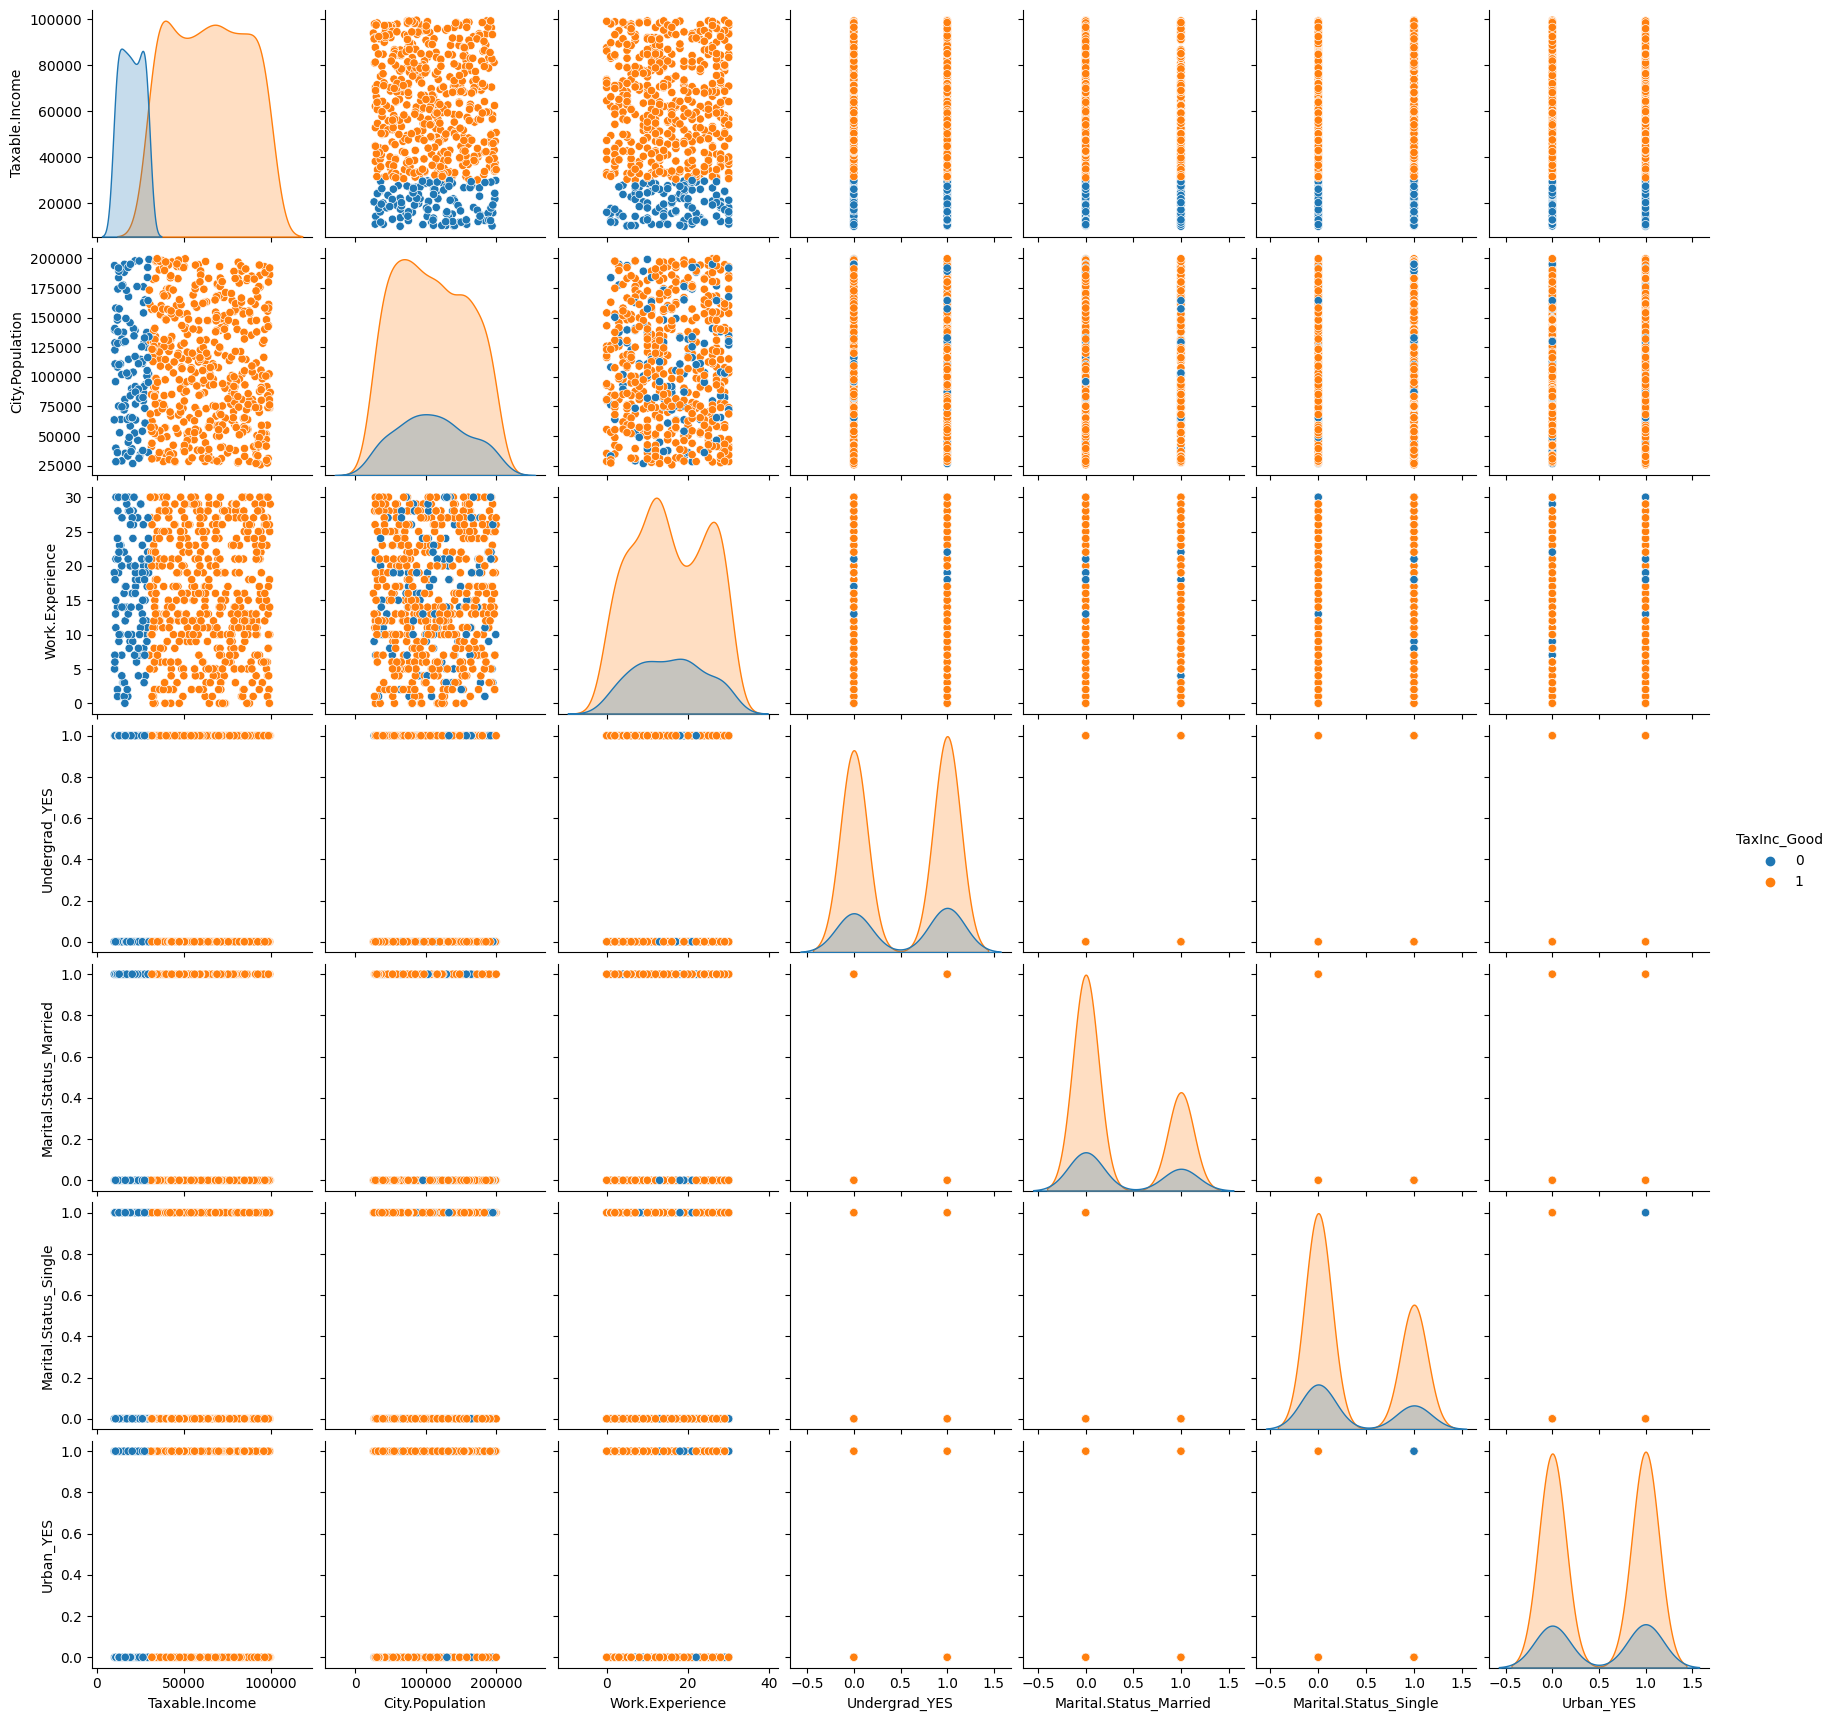

In [ ]:
import seaborn as sns
sns.pairplot(data=fd, hue = 'TaxInc_Good')

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [ ]:
df_norm = norm_func(fd.iloc[:,1:])
df_norm.tail(10)


City.Population  Work.Experience  Undergrad_YES  Marital.Status_Married  \
590         0.341473         0.466667            0.0                     1.0   
591         0.615406         0.600000            1.0                     0.0   
592         0.283703         0.533333            1.0                     0.0   
593         0.610256         0.333333            0.0                     0.0   
594         0.412341         0.300000            0.0                     1.0   
595         0.078811         0.233333            1.0                     0.0   
596         0.170058         0.066667            1.0                     0.0   
597         0.737240         0.000000            0.0                     0.0   
598         0.886810         0.566667            1.0                     1.0   
599         0.760683         0.533333            0.0                     0.0   

     Marital.Status_Single  Urban_YES  TaxInc_Good  
590                    0.0        1.0          1.0  
591                    1.0        1.0          0.0  
592                    1.0        0.0          1.0  
593                    0.0        1.0          1.0  
594                    0.0        1.0          1.0  
595                    0.0        1.0          1.0  
596                    0.0        1.0          1.0  
597                    0.0        1.0          1.0  
598                    0.0        0.0          1.0  
599                    0.0        0.0          1.0

In [ ]:
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
df_norm["income"]="<=30000"
df_norm.loc[fd["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[fd["Taxable.Income"]<=30000,"income"]="Risky"

In [ ]:
fd.drop(["Taxable.Income"],axis=1,inplace=True)

In [ ]:
fd.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fd.columns:
    if fd[column_name].dtype == object:
        fd[column_name] = le.fit_transform(fd[column_name])
    else:
        pass

In [ ]:
features = fd.iloc[:,0:5]
labels = fd.iloc[:,5]

In [ ]:
colnames = list(fd.columns)
predictors = colnames[0:5]
target = colnames[5]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3,stratify = labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [ ]:
model.estimators_
model.classes_
model.n_features_in_
model.n_classes_

2

In [ ]:
model.oob_score_


0.5595238095238095

In [ ]:
prediction = model.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
print(accuracy)

0.9904761904761905


In [ ]:
np.mean(prediction == y_train)

0.9904761904761905

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [ ]:
pred_test = model.predict(x_test)

In [ ]:
acc_test =accuracy_score(y_test,pred_test)
print(acc_test)

0.49444444444444446


Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

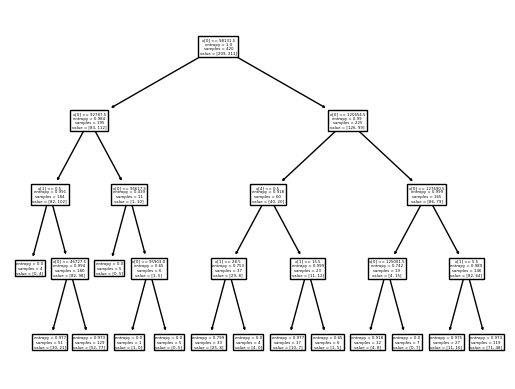

In [ ]:
from sklearn import tree
tree.plot_tree(model);

In [ ]:
colnames = list(fd.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

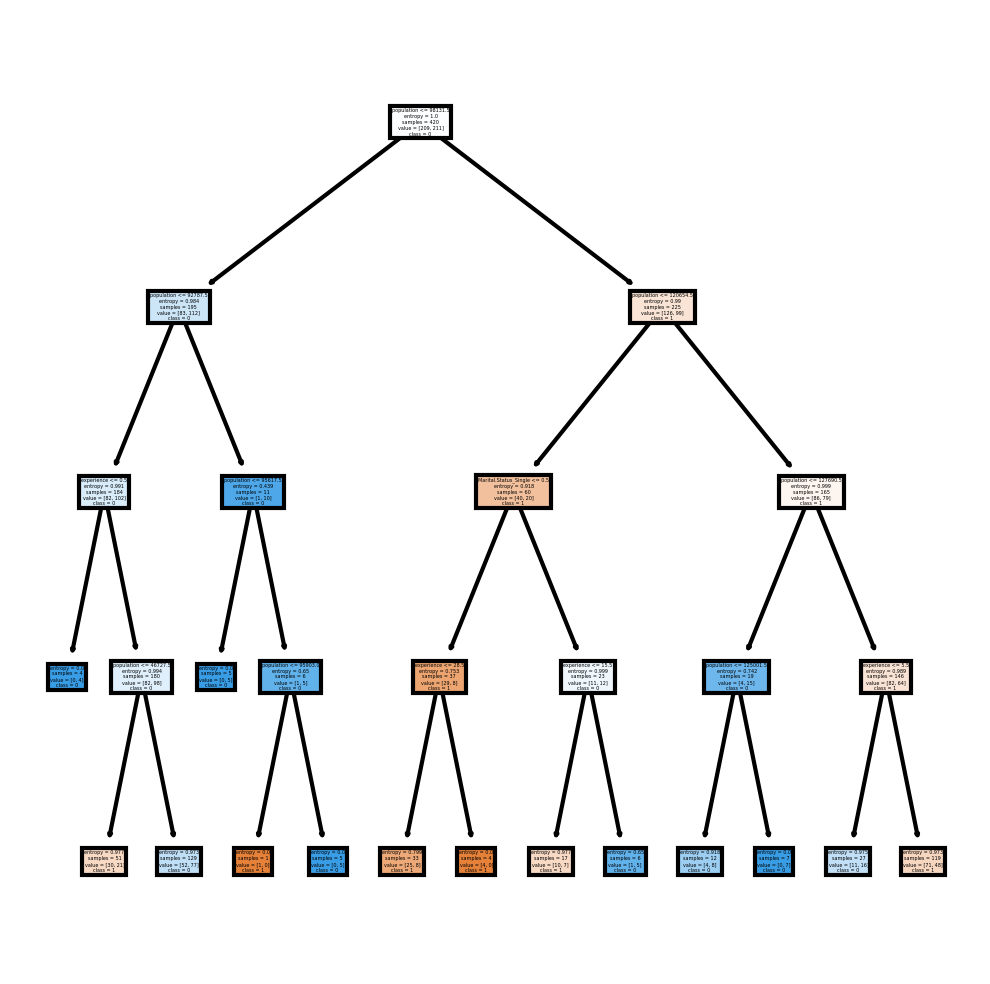

In [ ]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [ ]:
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category
preds

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds)

col_0       0   1
Urban_YES        
0          56  33
1          51  40

In [ ]:
np.mean(preds==y_test)

0.5333333333333333

Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5333333333333333

Decision Tree Regression Example

In [ ]:
from sklearn.tree import DecisionTreeRegressor
array = fd.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
ms=model.score(X_test,y_test)
print(abs(ms))

0.916234766774058
